# Dataset

In [145]:
from datasets import load_dataset
from datasets import load_dataset_builder
from datasets import get_dataset_split_names
from datasets import Dataset

In [8]:
from IPython.display import Image

def show_image(filename):
    display(Image(filename))

In [2]:
from datasets import load_dataset
ds = load_dataset("keremberke/pokemon-classification", name="full")

Extracting data files:   0%|          | 0/3 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Dataset pokemon-classification downloaded and prepared to /home/victor/.cache/huggingface/datasets/keremberke___pokemon-classification/full/1.0.0/5193d0f863ed08164636296506df483caa6c9965bc05198ec2136417398e4b28. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

In [5]:
example = ds['train'][0]
example

{'image_file_path': '/home/victor/.cache/huggingface/datasets/downloads/extracted/ddf83709112857bf2f6b4ee5ec4c42cc76c9bc0e000f7979b88cff71ac71f111/Abra/0282b2f3a22745f1a436054ea15a0ae5_jpg.rf.8672478a3b97f7c0c5b6737c3fd2d3d8.jpg',
 'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224>,
 'labels': 57}

In [6]:
type(example)

dict

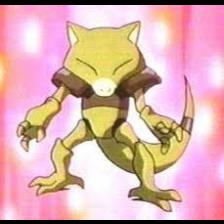

In [9]:
show_image(example['image_file_path'])

In [10]:
example

{'image_file_path': '/home/victor/.cache/huggingface/datasets/downloads/extracted/ddf83709112857bf2f6b4ee5ec4c42cc76c9bc0e000f7979b88cff71ac71f111/Abra/0282b2f3a22745f1a436054ea15a0ae5_jpg.rf.8672478a3b97f7c0c5b6737c3fd2d3d8.jpg',
 'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224>,
 'labels': 57}

In [11]:
ds

DatasetDict({
    train: Dataset({
        features: ['image_file_path', 'image', 'labels'],
        num_rows: 4869
    })
    validation: Dataset({
        features: ['image_file_path', 'image', 'labels'],
        num_rows: 1390
    })
    test: Dataset({
        features: ['image_file_path', 'image', 'labels'],
        num_rows: 732
    })
})

In [17]:
ds_builder = load_dataset_builder("keremberke/pokemon-classification", "full")

In [19]:
ds_builder.info.features

{'image_file_path': Value(dtype='string', id=None),
 'image': Image(decode=True, id=None),
 'labels': ClassLabel(names=['Porygon', 'Goldeen', 'Hitmonlee', 'Hitmonchan', 'Gloom', 'Aerodactyl', 'Mankey', 'Seadra', 'Gengar', 'Venonat', 'Articuno', 'Seaking', 'Dugtrio', 'Machop', 'Jynx', 'Oddish', 'Dodrio', 'Dragonair', 'Weedle', 'Golduck', 'Flareon', 'Krabby', 'Parasect', 'Ninetales', 'Nidoqueen', 'Kabutops', 'Drowzee', 'Caterpie', 'Jigglypuff', 'Machamp', 'Clefairy', 'Kangaskhan', 'Dragonite', 'Weepinbell', 'Fearow', 'Bellsprout', 'Grimer', 'Nidorina', 'Staryu', 'Horsea', 'Electabuzz', 'Dratini', 'Machoke', 'Magnemite', 'Squirtle', 'Gyarados', 'Pidgeot', 'Bulbasaur', 'Nidoking', 'Golem', 'Dewgong', 'Moltres', 'Zapdos', 'Poliwrath', 'Vulpix', 'Beedrill', 'Charmander', 'Abra', 'Zubat', 'Golbat', 'Wigglytuff', 'Charizard', 'Slowpoke', 'Poliwag', 'Tentacruel', 'Rhyhorn', 'Onix', 'Butterfree', 'Exeggcute', 'Sandslash', 'Pinsir', 'Rattata', 'Growlithe', 'Haunter', 'Pidgey', 'Ditto', 'Farfetchd

In [ ]:
ds_builder.info.features['labels'].names[57]

In [27]:
get_dataset_split_names("keremberke/pokemon-classification", "full")

['train', 'validation', 'test']

In [30]:
ds['train']['labels']

[57,
 57,
 57,
 57,
 57,
 57,
 57,
 57,
 57,
 57,
 57,
 57,
 57,
 57,
 57,
 57,
 57,
 57,
 57,
 57,
 57,
 57,
 57,
 57,
 57,
 57,
 57,
 57,
 57,
 57,
 57,
 57,
 57,
 57,
 57,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 127,
 127,
 127,
 127,
 127,
 127,
 127,
 127,
 127,
 127,
 127,
 127,
 127,
 127,
 127,
 127,
 127,
 127,
 127,
 127,
 127,
 127,
 127,
 127,
 127,
 127,
 127,
 127,
 127,
 127,
 127,
 127,
 127,
 127,
 127,
 127,
 127,
 127,
 127,
 127,
 127,
 127,
 127,
 127,
 127,
 127,
 127,
 127,
 127,
 127,
 127,
 127,
 138,
 138,
 138,
 138,
 138,
 138,
 138,
 138,
 138,
 138,
 138,
 138,
 138,
 138,
 138,
 138,
 138,
 138,
 138,
 138,
 138,
 138,
 138,
 138,
 138,
 138,
 138,
 138,
 138,
 138,
 138,
 138,
 138,
 138,
 138,
 138,
 138,
 138,
 138,
 138,
 138,
 83,
 83,
 83,
 83,
 83,
 83,
 83,
 83,
 83,
 83,
 83,
 83,
 83,
 83,
 83,
 83,
 83,
 83,
 83,
 83,
 83,
 83,
 83,
 83,
 83,
 8

## Dataset Preprocess

### Text Dataset Example

In [31]:
from transformers import AutoTokenizer
from datasets import load_dataset


In [33]:
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
dataset = load_dataset("rotten_tomatoes", split="train")

Generating train split:   0%|          | 0/8530 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/1066 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1066 [00:00<?, ? examples/s]

Dataset rotten_tomatoes downloaded and prepared to /home/victor/.cache/huggingface/datasets/rotten_tomatoes/default/1.0.0/40d411e45a6ce3484deed7cc15b82a53dad9a72aafd9f86f8f227134bec5ca46. Subsequent calls will reuse this data.


In [34]:
tokenizer(dataset[0]["text"])

{'input_ids': [101, 1996, 2600, 2003, 16036, 2000, 2022, 1996, 7398, 2301, 1005, 1055, 2047, 1000, 16608, 1000, 1998, 2008, 2002, 1005, 1055, 2183, 2000, 2191, 1037, 17624, 2130, 3618, 2084, 7779, 29058, 8625, 13327, 1010, 3744, 1011, 18856, 19513, 3158, 5477, 4168, 2030, 7112, 16562, 2140, 1012, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [35]:
def tokenization(example):
    return tokenizer(example["text"])

In [41]:
dataset = dataset.map(tokenization, batched=True)

Loading cached processed dataset at /home/victor/.cache/huggingface/datasets/rotten_tomatoes/default/1.0.0/40d411e45a6ce3484deed7cc15b82a53dad9a72aafd9f86f8f227134bec5ca46/cache-54da4bab5db0145f.arrow


In [42]:
dataset = dataset.set_format(type="torch", columns=["input_ids", "token_type_ids", "attention_mask", "label"])

### Image Dataset Example

In [43]:
from transformers import AutoFeatureExtractor
from datasets import load_dataset, Image


In [44]:
feature_extractor = AutoFeatureExtractor.from_pretrained("google/vit-base-patch16-224-in21k")
dataset = load_dataset("beans", split="train")


/home/victor/miniconda3/envs/ctrl_net/lib/python3.10/site-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


Extracting data files:   0%|          | 0/3 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/1034 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/133 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/128 [00:00<?, ? examples/s]

Dataset beans downloaded and prepared to /home/victor/.cache/huggingface/datasets/beans/default/0.0.0/90c755fb6db1c0ccdad02e897a37969dbf070bed3755d4391e269ff70642d791. Subsequent calls will reuse this data.


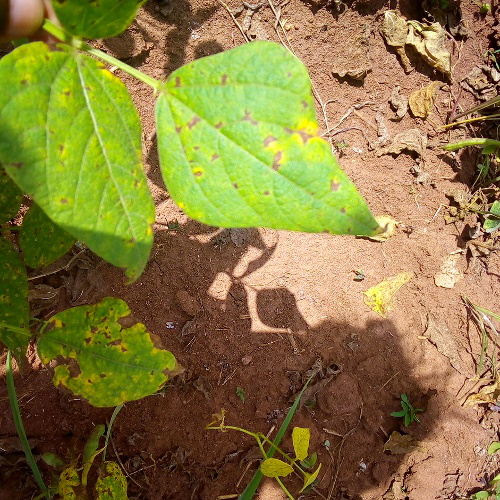

In [48]:
dataset[0]["image"]

In [49]:
from torchvision.transforms import RandomRotation
rotate = RandomRotation(degrees=(0, 90))
def transforms(examples):
    examples["pixel_values"] = [rotate(image.convert("RGB")) for image in examples["image"]]
    return examples


In [50]:
dataset.set_transform(transforms)


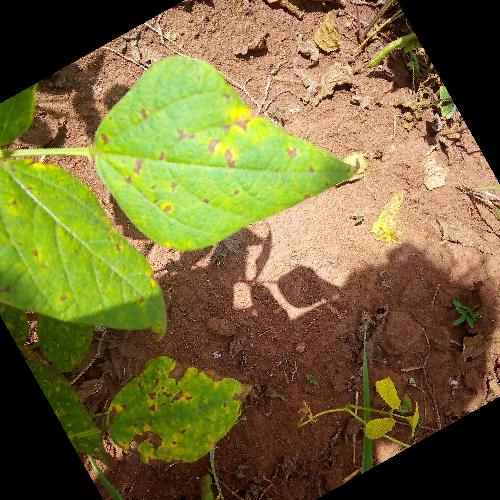

In [51]:
dataset[0]["pixel_values"]


### ControlNet Fill50k

In [105]:
fill50k_ds = load_dataset("fusing/fill50k")

No config specified, defaulting to: fill50k/default
Found cached dataset fill50k (/home/victor/.cache/huggingface/datasets/fusing___fill50k/default/0.0.2/f23b778406682a796a540934e7163495e1b8a88fefc76ca08f7e5a79ddcd668b)


  0%|          | 0/1 [00:00<?, ?it/s]

In [106]:
fill50k_ds

DatasetDict({
    train: Dataset({
        features: ['image', 'conditioning_image', 'text'],
        num_rows: 50000
    })
})

In [107]:
fill50k_ds['train'][0]

{'image': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=512x512>,
 'conditioning_image': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=512x512>,
 'text': 'pale golden rod circle with old lace background'}

# Prepare Pokemon Dataset

In [56]:
ds = load_dataset("keremberke/pokemon-classification", name="full")
ds

Found cached dataset pokemon-classification (/home/victor/.cache/huggingface/datasets/keremberke___pokemon-classification/full/1.0.0/5193d0f863ed08164636296506df483caa6c9965bc05198ec2136417398e4b28)


  0%|          | 0/3 [00:00<?, ?it/s]

DatasetDict({
    train: Dataset({
        features: ['image_file_path', 'image', 'labels'],
        num_rows: 4869
    })
    validation: Dataset({
        features: ['image_file_path', 'image', 'labels'],
        num_rows: 1390
    })
    test: Dataset({
        features: ['image_file_path', 'image', 'labels'],
        num_rows: 732
    })
})

In [77]:
ds_builder = load_dataset_builder("keremberke/pokemon-classification", "full")
pk_labels = ds_builder.info.features['labels'].names

In [78]:
# Get named labels
pk_i2label = {i: pk_labels[i] for i in range(len(pk_labels))}
pk_i2label

{0: 'Porygon',
 1: 'Goldeen',
 2: 'Hitmonlee',
 3: 'Hitmonchan',
 4: 'Gloom',
 5: 'Aerodactyl',
 6: 'Mankey',
 7: 'Seadra',
 8: 'Gengar',
 9: 'Venonat',
 10: 'Articuno',
 11: 'Seaking',
 12: 'Dugtrio',
 13: 'Machop',
 14: 'Jynx',
 15: 'Oddish',
 16: 'Dodrio',
 17: 'Dragonair',
 18: 'Weedle',
 19: 'Golduck',
 20: 'Flareon',
 21: 'Krabby',
 22: 'Parasect',
 23: 'Ninetales',
 24: 'Nidoqueen',
 25: 'Kabutops',
 26: 'Drowzee',
 27: 'Caterpie',
 28: 'Jigglypuff',
 29: 'Machamp',
 30: 'Clefairy',
 31: 'Kangaskhan',
 32: 'Dragonite',
 33: 'Weepinbell',
 34: 'Fearow',
 35: 'Bellsprout',
 36: 'Grimer',
 37: 'Nidorina',
 38: 'Staryu',
 39: 'Horsea',
 40: 'Electabuzz',
 41: 'Dratini',
 42: 'Machoke',
 43: 'Magnemite',
 44: 'Squirtle',
 45: 'Gyarados',
 46: 'Pidgeot',
 47: 'Bulbasaur',
 48: 'Nidoking',
 49: 'Golem',
 50: 'Dewgong',
 51: 'Moltres',
 52: 'Zapdos',
 53: 'Poliwrath',
 54: 'Vulpix',
 55: 'Beedrill',
 56: 'Charmander',
 57: 'Abra',
 58: 'Zubat',
 59: 'Golbat',
 60: 'Wigglytuff',
 61: 'Ch

In [92]:
ds['train'][0]

{'image_file_path': '/home/victor/.cache/huggingface/datasets/downloads/extracted/ddf83709112857bf2f6b4ee5ec4c42cc76c9bc0e000f7979b88cff71ac71f111/Abra/0282b2f3a22745f1a436054ea15a0ae5_jpg.rf.8672478a3b97f7c0c5b6737c3fd2d3d8.jpg',
 'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224>,
 'labels': 57}

In [200]:
# Group images by labels
from collections import defaultdict

images_by_label = defaultdict(list)
image_paths_by_label = defaultdict(list)
for d in ds['train']:
    label = pk_i2label[d['labels']].lower()
    images_by_label[label].append(d['image'])
    image_paths_by_label[label].append(d['image_file_path'])
    

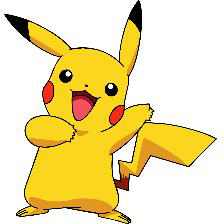

In [104]:
images_by_label['pikachu'][1]

In [108]:
fill50k_ds

DatasetDict({
    train: Dataset({
        features: ['image', 'conditioning_image', 'text'],
        num_rows: 50000
    })
})

In [117]:
def gen_pk_data():
    for label, imgs in images_by_label.items():
        c_img = imgs[0]
        for im in imgs:
            yield {'image': im, 'conditioning_image': c_img, 'text': ''}

In [136]:
a = list(gen_pk_data())
len(a)

4869

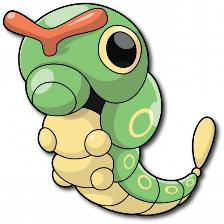

In [143]:
a[500]['conditioning_image']

In [176]:
pk_dataset = Dataset.from_generator(gen_pk_data)

Found cached dataset generator (/home/victor/.cache/huggingface/datasets/generator/default-c48af395c082ac6e/0.0.0)


In [177]:
pk_dataset

Dataset({
    features: ['image', 'conditioning_image', 'text'],
    num_rows: 4869
})

In [178]:
pk_dataset = pk_dataset.train_test_split(test_size=0.01)
pk_dataset

DatasetDict({
    train: Dataset({
        features: ['image', 'conditioning_image', 'text'],
        num_rows: 4820
    })
    test: Dataset({
        features: ['image', 'conditioning_image', 'text'],
        num_rows: 49
    })
})

In [184]:
pk_dataset.save_to_disk("./pokemon_dataset")

Saving the dataset (0/1 shards):   0%|          | 0/4820 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/49 [00:00<?, ? examples/s]

In [185]:
!ls ./pokemon_dataset

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
dataset_dict.json  test/  train/


In [186]:
from datasets import load_from_disk

reloaded_pk_dataset = load_from_disk("./pokemon_dataset")
reloaded_pk_dataset                            


DatasetDict({
    train: Dataset({
        features: ['image', 'conditioning_image', 'text'],
        num_rows: 4820
    })
    test: Dataset({
        features: ['image', 'conditioning_image', 'text'],
        num_rows: 49
    })
})

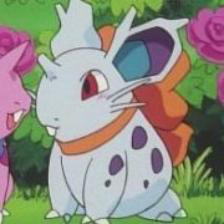

In [188]:
reloaded_pk_dataset['train'][500]['conditioning_image']

# Training ControlNet

In [155]:
ds['test'][0]

{'image_file_path': '/home/victor/.cache/huggingface/datasets/downloads/extracted/8d8ab437234771bdba1aca8cf91ca88949de87967c6e57cc20dee74f89ef736a/Alakazam/1115f34ff9884a6ab3ceaafa87a0dfd4_jpg.rf.8d4fee20d6a1f27951df8c2db027356a.jpg',
 'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224>,
 'labels': 127}

In [156]:
ds['test'][1]

{'image_file_path': '/home/victor/.cache/huggingface/datasets/downloads/extracted/8d8ab437234771bdba1aca8cf91ca88949de87967c6e57cc20dee74f89ef736a/Alakazam/601729d8dcd84c688d51072821a7dc8b_jpg.rf.7f1ca2e969f46e11c6eb2b2a22ae7c35.jpg',
 'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224>,
 'labels': 127}

Command to run:

```bash
export MODEL_DIR="runwayml/stable-diffusion-v1-5"
export OUTPUT_DIR="pokemon_models"

accelerate launch --mixed_precision="fp16" --multi_gpu train_controlnet.py \
 --pretrained_model_name_or_path=$MODEL_DIR \
 --output_dir=$OUTPUT_DIR \
 --dataset_name=/home/victor/Workspace/diffusers/examples/controlnet/pokemon_dataset \
 --resolution=224 \
 --learning_rate=1e-5 \
 --validation_image "/home/victor/.cache/huggingface/datasets/downloads/extracted/8d8ab437234771bdba1aca8cf91ca88949de87967c6e57cc20dee74f89ef736a/Alakazam/1115f34ff9884a6ab3ceaafa87a0dfd4_jpg.rf.8d4fee20d6a1f27951df8c2db027356a.jpg" \
                    "/home/victor/.cache/huggingface/datasets/downloads/extracted/8d8ab437234771bdba1aca8cf91ca88949de87967c6e57cc20dee74f89ef736a/Alakazam/601729d8dcd84c688d51072821a7dc8b_jpg.rf.7f1ca2e969f46e11c6eb2b2a22ae7c35.jpg" \
 --validation_prompt "" "" \
 --train_batch_size=4 \
 --mixed_precision="fp16" \
 --tracker_project_name="controlnet-pokemon" \
 --report_to=wandb
```

Also, need to changes to train_controlnet


# Inference

In [189]:
from diffusers import StableDiffusionControlNetPipeline, ControlNetModel, UniPCMultistepScheduler
from diffusers.utils import load_image
import torch

In [190]:
base_model_path = "runwayml/stable-diffusion-v1-5"
controlnet_path = '/home/victor/Workspace/diffusers/examples/controlnet/pokemon_models/checkpoint-1000/controlnet'

controlnet = ControlNetModel.from_pretrained(controlnet_path, torch_dtype=torch.float16)
pipe = StableDiffusionControlNetPipeline.from_pretrained(
    base_model_path, controlnet=controlnet, torch_dtype=torch.float16
)

# speed up diffusion process with faster scheduler and memory optimization
pipe.scheduler = UniPCMultistepScheduler.from_config(pipe.scheduler.config)
# remove following line if xformers is not installed
pipe.enable_xformers_memory_efficient_attention()

pipe.enable_model_cpu_offload()

control_image = load_image("./conditioning_image_1.png")
prompt = "pale golden rod circle with old lace background"

# generate image
generator = torch.manual_seed(0)

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
/home/victor/miniconda3/envs/ctrl_net/lib/python3.10/site-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(


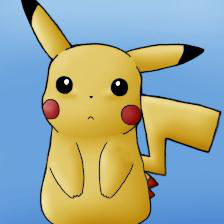

In [203]:
image_paths_by_label['pikachu'][0]
images_by_label['pikachu'][0]

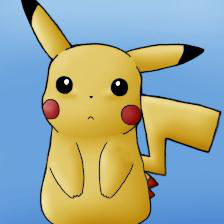

In [205]:
control_image = load_image(image_paths_by_label['pikachu'][0])
prompt = ""
control_image

  0%|          | 0/500 [00:00<?, ?it/s]

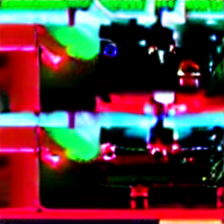

In [206]:
image = pipe(
     prompt, num_inference_steps=500, generator=generator, image=control_image
).images[0]

image